# Tarea 3
**Nota: Puede ver el código en este link: [https://colab.research.google.com/drive/1PeezMzlqHvxPJKrWYeX6AYXYzU77kiIb?usp=sharing](https://colab.research.google.com/drive/1PeezMzlqHvxPJKrWYeX6AYXYzU77kiIb?usp=sharing)**

Para la entrega de esta tarea usted debe entregar: Reporte donde indique el código que utilizó para contestar a cada pregunta, el resultado del código,  también deberá entregar los archivos del código y los archivos solicitados en las preguntas que vienen a continuación. Usted hará un archivo comprimido con el reporte y con los archivos solicitados en la tarea.

In [1]:
# Importando librerías
import cv2 # Para manejar imágenes
import matplotlib.pyplot as plt # Para visualizar las imágenes (Se puede hacer de otra manera con una librería de google pero meh, este está bueno)
import numpy as np # Para operar matrices y arreglos de manera sencilla
import os # Para trabajar con archivos y rutas

## 0. Funciones auxialiares
Estas funciones me ayudarán más adelante en la tarea

In [2]:
def show_img(img, size = (7, 7), schema = [1,1]):
    fig, axs = plt.subplots(*schema, figsize=size)
    axs.imshow(img)
    axs.axis("off")

## 1. ¿de qué tamaño, en bytes, son cada una de las cuatro imágenes indicadas anteriormente?

*Analizando las imágenes desde mi computador, me da los siguientes resultados, ordenados de C1 a C4*

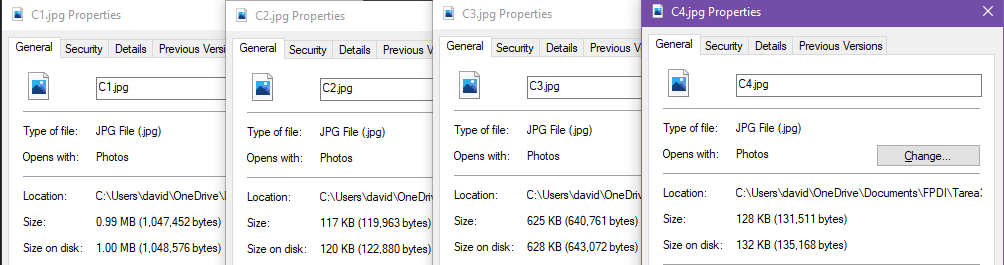

## 2. Cargue en memoria cada uno de las cuatro imágenes, llame a cada matriz C1, C2, C3 y C4. Indique cuantos bytes ocupan en memoria cada matriz. Divida el número de bytes que ocupa cada archivo entre el número de bytes que ocupa cada matriz. Esos cuatro cocientes ¿son iguales? ¿Por que cree que suceda eso que acaba de reportar?

In [3]:
# Leyendo imágenes
# Nota: OpenCV lee las imágenes en formato BGR en lugar de RGB, por eso las convertimos con cvtColor y las leemos con imread
C1 = cv2.cvtColor(cv2.imread("C1.jpg"), cv2.COLOR_BGR2RGB) 
C2 = cv2.cvtColor(cv2.imread("C2.jpg"), cv2.COLOR_BGR2RGB)
C3 = cv2.cvtColor(cv2.imread("C3.jpg"), cv2.COLOR_BGR2RGB)
C4 = cv2.cvtColor(cv2.imread("C4.jpg"), cv2.COLOR_BGR2RGB)
# Visualizar una matriz
C1[:1]

array([[[128, 139, 145],
        [127, 138, 144],
        [127, 138, 144],
        ...,
        [203, 186, 170],
        [203, 186, 170],
        [204, 187, 171]]], dtype=uint8)

In [4]:
# Por simplicidad guardemos en un arreglo de imágenes
imgs = [C1, C2, C3, C4]
imgs_paths = ['C1', 'C2', 'C3', 'C4']
img_size = []
mat_size = []

In [5]:
# Tamaño de las imágenes en bytes, usando la función getsize que está dentro de la librería os
for path in imgs_paths:
    img_size.append(os.path.getsize(f"{path}.jpg"))

In [6]:
# Tamaño en bytes de cada matriz, usando el atributo de los numpy arrays llamado nbytes
for img in imgs:
    mat_size.append(img.nbytes)

In [7]:
# Imprimiendo resultados
for index, items in enumerate(zip(img_size, mat_size)):
    img, mat = items
    print(f"La imagen {index + 1} pesa: {img} y su matriz pesa {mat} en bytes")

La imagen 1 pesa: 1047452 y su matriz pesa 12288000 en bytes
La imagen 2 pesa: 119963 y su matriz pesa 2359296 en bytes
La imagen 3 pesa: 640761 y su matriz pesa 6912000 en bytes
La imagen 4 pesa: 131511 y su matriz pesa 3264000 en bytes


In [8]:
# Divida el número de bytes que ocupa cada archivo entre el número de bytes que ocupa cada matriz.
for index, items in enumerate(zip(img_size, mat_size)):
    img, mat = items
    print(f"La división del tamaño del archivo entre el tamaño de la matriz para {index + 1} es: {img / mat}")

La división del tamaño del archivo entre el tamaño de la matriz para 1 es: 0.08524186197916667
La división del tamaño del archivo entre el tamaño de la matriz para 2 es: 0.0508469475640191
La división del tamaño del archivo entre el tamaño de la matriz para 3 es: 0.09270269097222222
La división del tamaño del archivo entre el tamaño de la matriz para 4 es: 0.040291360294117645


**Esos cuatro cocientes ¿son iguales? ¿Por que cree que suceda eso que acaba de reportar?**

*No son iguales, tengo la sospecha de que deberían de serlo porque el tamaño en bytes de cada uno de las matrices es `alto * ancho * canales * tamaño_de_tipo_de_dato` donde el `tamaño_de_tipo_de_dato` en este caso es 8 porque son enteros de 8 bytes. Entonces significa que el cómo se miden los tamaños de las imágenes es diferente aunque sean del mismo tipo. Esto se puede deber a que el formato de imagen jpg comprime cada una de las imágenes de maneras distintas dependiendo de los cambios de colores que existan en cada una de ellas. Ya que genera sub-matrices dentro de la imagen con colores iguales para regiones específicas donde no hay un cambio significativo de color.

## 3. Haga 4 imágenes formadas por los 512x512 pixeles centrales de cada una de las imágenes originales C1, C2, C3 y C4, llámelas Im1, Im2, Im3 e Im4 respectivamente. Despliegue cada una de las nuevas imágenes

In [9]:
def make_512x512_images(img, size = 512):
    """
    Esta función nos grafica dos imágenes, la primera es la original 
    indicando el centro y el rectángulo de 512x512 que vamos a sacar
    y la segunda es la imágen solo de lo que hay dentro de este recuadro 
    de 512x512 (se regresa también esta imagen).
    """
    middle_row = img.shape[0]//2
    middle_col = img.shape[1]//2
    plot_size = size // 2
    row_i = middle_row - plot_size
    row_f = middle_row + plot_size
    col_i = middle_col - plot_size
    col_f = middle_col + plot_size
    fig, axs = plt.subplots(1,2, figsize=(15, 10), gridspec_kw={'width_ratios': [4, 3]})

    # Grafica la imagen completa con el recuadro en el centro
    axs[0].imshow(img) # Imprimir imagen
    axs[0].scatter(middle_col, middle_row, c = 'r') # Punto en medio
    axs[0].plot(np.linspace(col_i, col_f, size), [middle_row - plot_size] * size, linewidth=4, c = 'r') # Arriba
    axs[0].plot(np.linspace(col_i, col_f, size), [middle_row + plot_size] * size, linewidth=4, c = 'r') # Abajo
    axs[0].plot([middle_col - plot_size] * size, np.linspace(row_i, row_f, size), linewidth=4, c = 'r') # Izquierda
    axs[0].plot([middle_col + plot_size] * size, np.linspace(row_i, row_f, size), linewidth=4, c = 'r') # Izquierda
    axs[0].axis("off")

    # Grafica solo lo que está dentro de este cuadrado
    img_512 = img[middle_row - plot_size:middle_row + plot_size, middle_col - plot_size:middle_col + plot_size]
    axs[1].imshow(img_512)
    axs[1].axis("off")
    return img_512


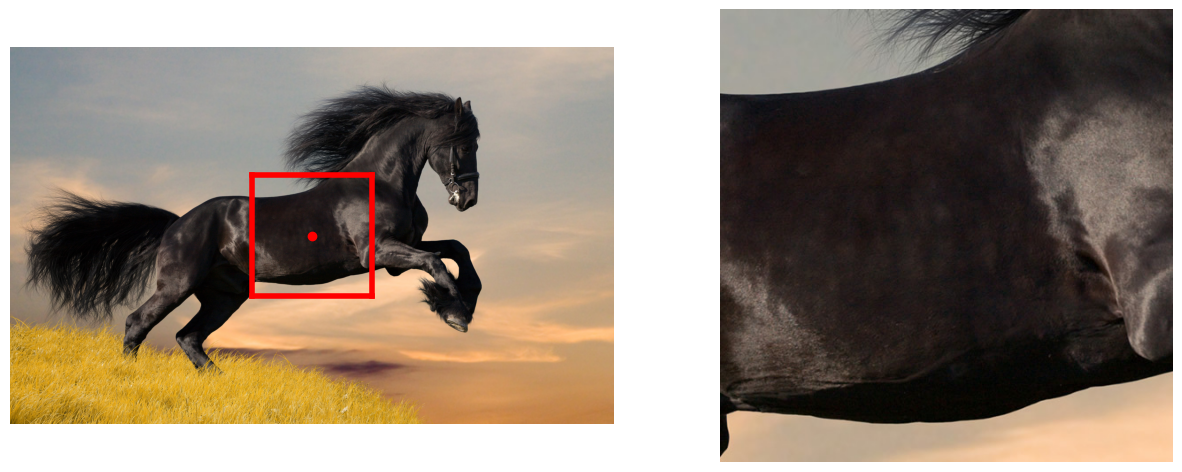

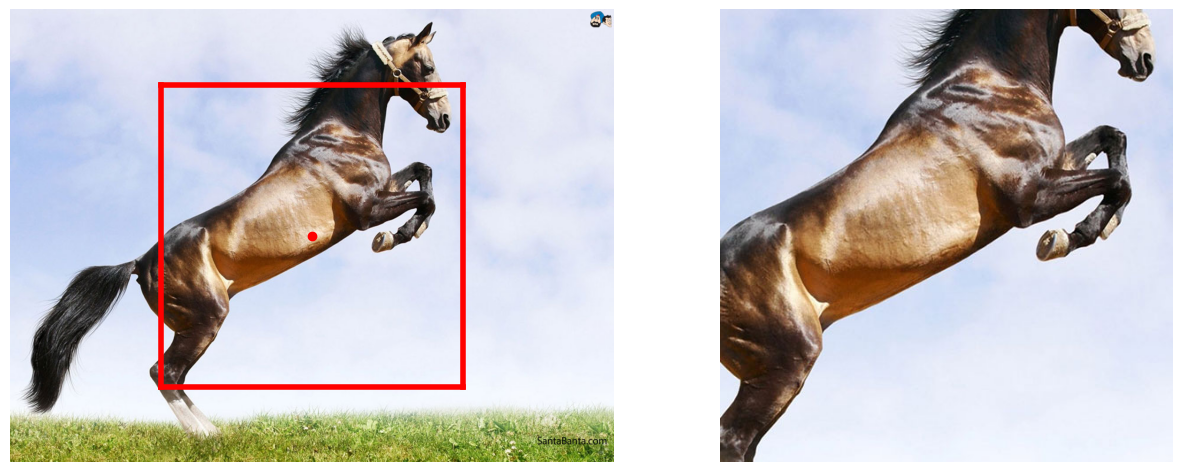

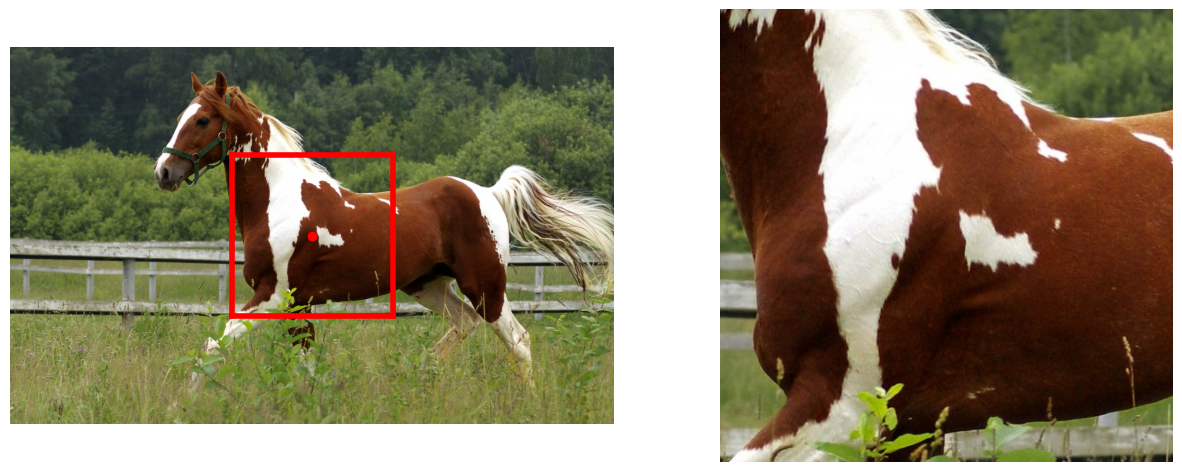

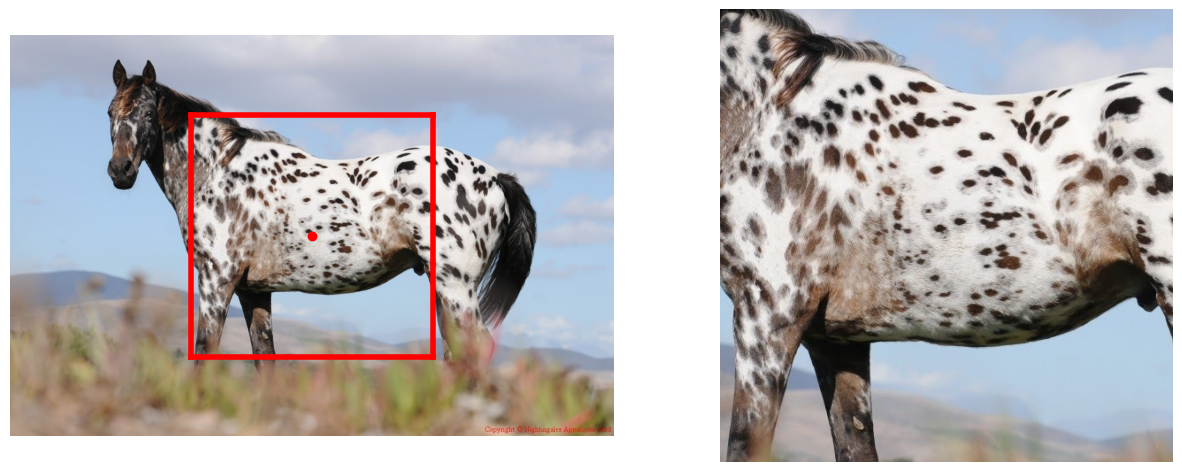

In [10]:
# Definiendo nuestras nuevas imágenes
Im1 = make_512x512_images(C1)
Im2 = make_512x512_images(C2)
Im3 = make_512x512_images(C3)
Im4 = make_512x512_images(C4)

## 4. Ahora haga una nueva imagen (Im5) que contenga un mosaico con las 4 imágenes obtenidas en la pregunta tres y acomodadas de la siguiente manera:

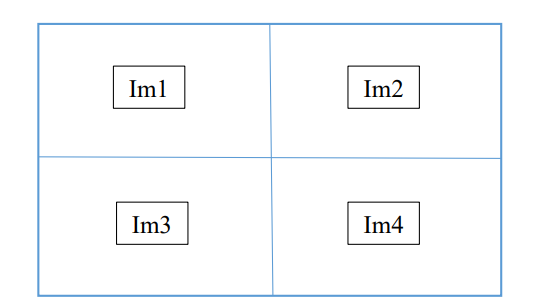

## Una vez construida la imagen muéstrela en pantalla.


In [11]:
# Crear una matriz de ceros para empezar
Im5 = np.zeros((512*2, 512*2, 3), dtype=np.int64)
# Introducir nuestras imágenes en la matriz Im5
Im5[:512, :512] = Im1 # Arriba Izquierda
Im5[512:, :512] = Im2 # Arriba Derecha
Im5[:512, 512:] = Im3 # Abajo Izquierda
Im5[512:, 512:] = Im4 # Abajo Derecha

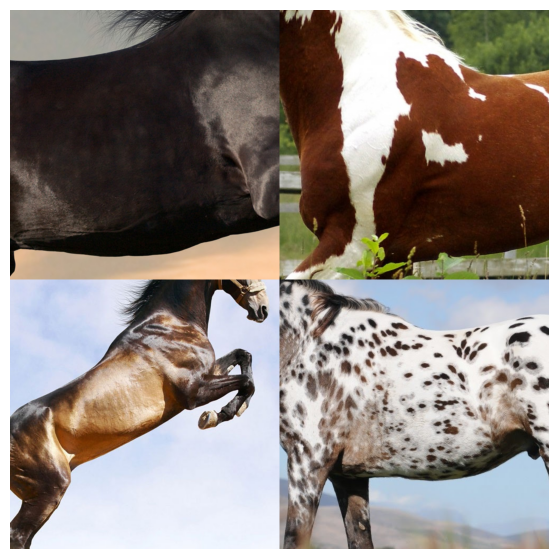

In [12]:
show_img(Im5)

## 5.  Para la imagen Im5, grafique usando la función plot, los valores del canal rojo de todas las columnas del renglón 256

In [13]:
# Todas las columnas del renglón 256 están dadas por:
cols_from_row_256 = Im5[256, :]
# Y el canal rojo de RGB es el primero
red_channel = cols_from_row_256[:, 0]

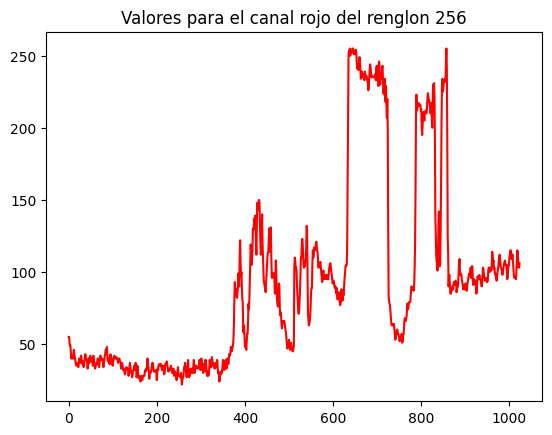

In [14]:
# Y graficamos
plt.plot(red_channel, c= 'r')
plt.title('Valores para el canal rojo del renglon 256')
plt.show()

¡Tiene sentido! La imagen en la fila 256 es aproximadamente la siguiente:

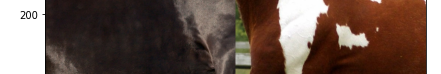

Donde se puede ver que la primera mitad es negra y no tiene mucho rojo, luego se puede ver un incremento en este color debido al caballo 2, y sube al tope con la mancha blanca del caballo, esto porque el blanco es la combinación de todos los colores.Y luego hay una caída pequeña, porque de nuevo está la parte café del caballo, luego vuelve a subir por la segunda mancha blanca que aparece en esa fila, y después vuelve a bajar a niveles normales por el café del caballo.

# 6. Para la imagen Im5, grafique usando la función plot, los valores del canal azul de los renglones pares de la columna 256.

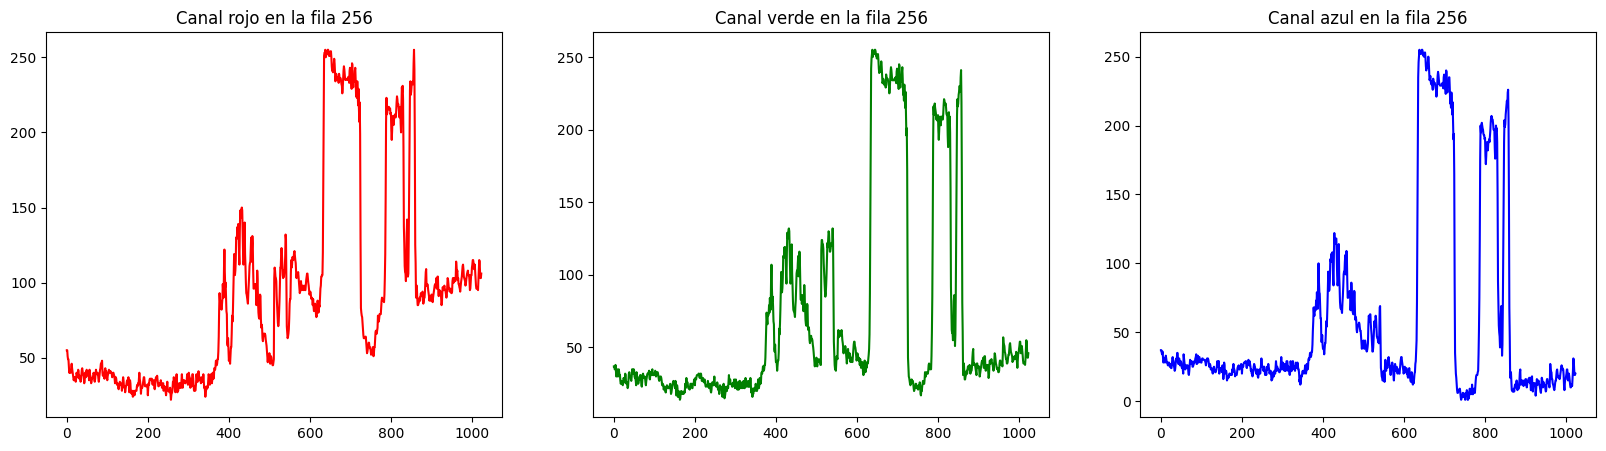

In [15]:
# Se graficarán los 3 colores por separado, luego juntos
green_channel = cols_from_row_256[:, 1]
blue_channel = cols_from_row_256[:, 2]
fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].plot(red_channel, c='r')
ax[0].set_title('Canal rojo en la fila 256')
ax[1].plot(green_channel, c='g')
ax[1].set_title('Canal verde en la fila 256')
ax[2].plot(blue_channel, c='b')
ax[2].set_title('Canal azul en la fila 256')
plt.show()

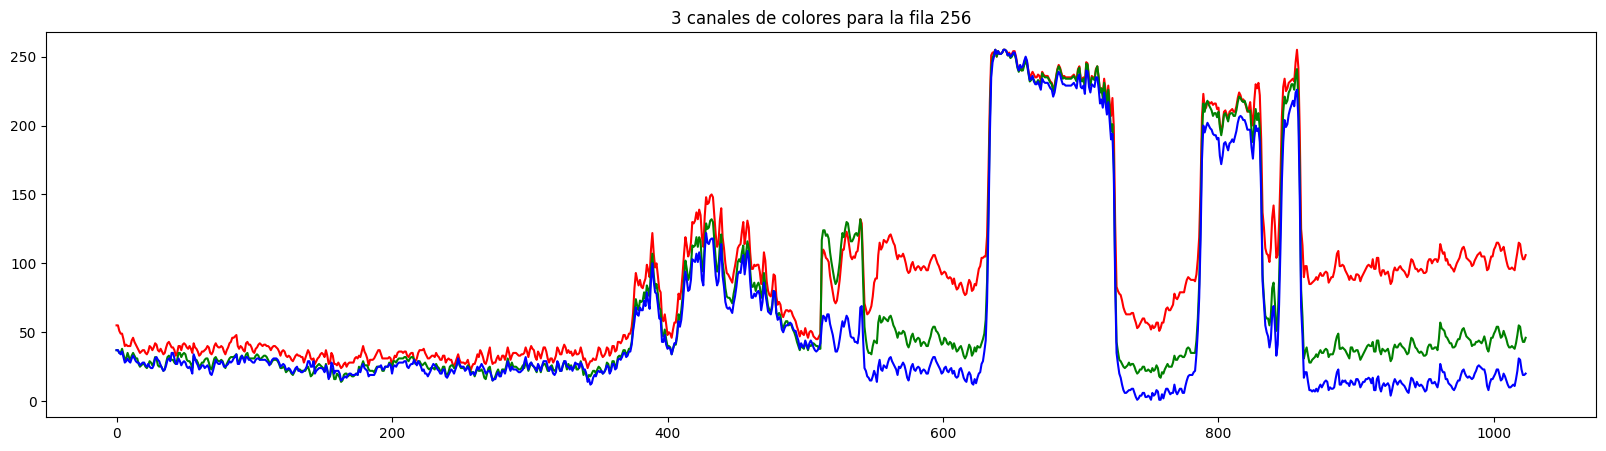

In [16]:
# Juntos los 3 colores
plt.figure(figsize=(20, 5))
plt.plot(red_channel, c='r')
plt.plot(green_channel, c = 'g')
plt.plot(blue_channel, c = 'b')
plt.title('3 canales de colores para la fila 256')
plt.show()

## 7. Grabe Im5 de la pregunta anterior en archivos con formato jpg, bmp y png. Reporte el tamaño en bytes de cada uno de los archivos generados.

In [17]:
# Recuerde que cv2 maneja imágenes en BGR en lugar de RGB, por eso tenemos que transformarlo para que guarde las imágenes de manera correcta
# Para poder cambiar el color los canales podemos hacer varias cosas, usaré cosas ya implementadas en cv2 para no tardarme tanto y son más óptimas que programar en python vanilla
float_img = np.float32(Im5) # Transformar de enteros a flotantes
bgr_img = cv2.cvtColor(float_img, cv2.COLOR_RGB2BGR) # Cambiando canales de color 
cv2.imwrite('Im5.jpg', bgr_img) # jpg
cv2.imwrite('Im5.bmp', bgr_img) # bmp
cv2.imwrite('Im5.png', bgr_img) # png

True

Como podemos observar en la siguiente imagen:
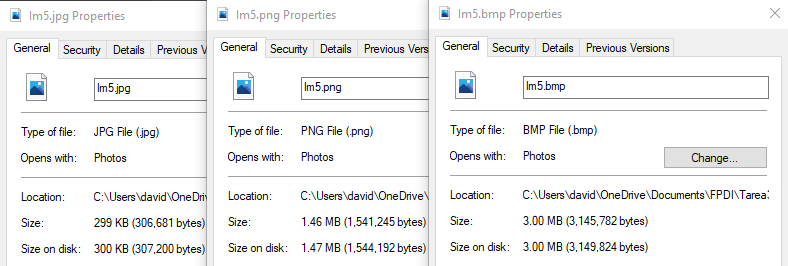

El más ligero es el **jpg**, el que le sigue es el **png**, y al final, el  más pesado, y lo que esperábamos, es el **bmp**.

- **jpg**: 306,681 bytes
- **png**: 1,541,245 bytes
- **bmp**: 3,145,782 bytes